# **TEMPERATURE DISTRIBUTION PREDICTOR OF A 2D CHANNEL FLOW OF HEAT**




In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('deltemp0.01.csv')
df2 = pd.read_csv('deltemp2.csv')
df3 = pd.read_csv('deltemp-2.csv')
df4 = pd.read_csv('deltemp100.csv')

**FOR TEMP. DIFF OF 0.01 DEGREE CELCIUS**

In [13]:

X1 = df1[['X-Val','Y-Val']]
y1 = df1['Temperature']


**FOR TEMP. DIFF OF 2 DEGREE CELCIUS**

In [14]:

# X2 = df2[['X-Val','Y-Val']]
# y2 = df2['Temperature']


**FOR TEMP. DIFF OF -2 DEGREE CELCIUS**

In [15]:

# X3 = df3[['X-Val','Y-Val']]
# y3 = df3['Temperature']



**FOR TEMP. DIFF OF 100 DEGREE CELCIUS**

In [16]:

# X4 = df4[['X-Val','Y-Val']]
# y4 = df4['Temperature']

In [17]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 9)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 9)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 9)
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3, random_state = 9)

In [18]:
mod =  DecisionTreeRegressor()
mod.fit(X1,y1)

DecisionTreeRegressor()

In [19]:
y1_pred= mod.predict(X1_test)

In [20]:
new_df1=X1_test.copy()
new_df1['U_true']=y1_test
new_df1['U_test']=y1_pred
new_df1['diff']=abs(y1_pred-y1_test)
new_df1

,X-Val,Y-Val,U_true,U_test,diff
3644,44,36,100.685174,100.685174,0.0
9184,84,91,100.147967,100.147967,0.0
520,20,5,100.118073,100.118073,0.0
5685,85,56,100.380834,100.380834,0.0
2401,1,24,100.037240,100.037240,0.0
...,...,...,...,...,...
7104,4,71,100.120640,100.120640,0.0
2297,97,22,100.051942,100.051942,0.0
6476,76,64,100.511270,100.511270,0.0
6684,84,66,100.372421,100.372421,0.0


**Comparison between True and Predicted value**

**Test Value**

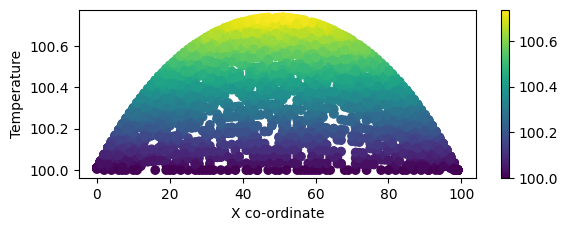

In [21]:

plt.subplot(2,1,1)
plt.scatter(new_df1['X-Val'],new_df1['U_test'],c=new_df1['U_test'])
plt.xlabel('X co-ordinate')
plt.ylabel('Temperature')
cbar = plt.colorbar()
plt.show()

**True Value**

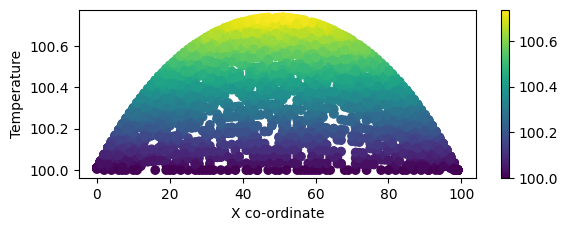

In [22]:
plt.subplot(2,1,2)
plt.scatter(new_df1['X-Val'],new_df1['U_true'],c=new_df1['U_test'])
plt.xlabel('X co-ordinate')
plt.ylabel('Temperature')
cbar = plt.colorbar()
plt.show()

**Error**

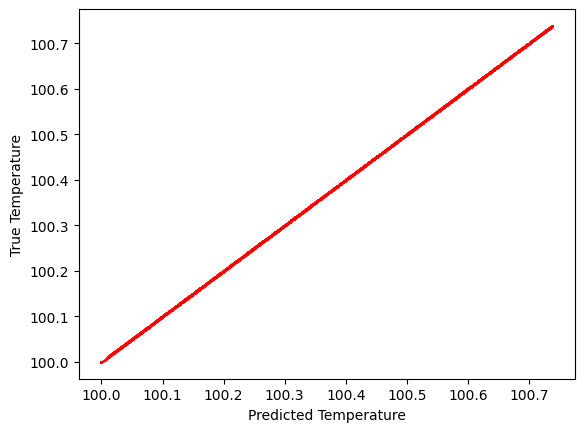

In [23]:
plt.scatter(new_df1['U_true'],new_df1['U_test'],c='red',s=1)
plt.xlabel('Predicted Temperature')
plt.ylabel('True Temperature')
plt.show()